# Parte 1 - Resolvendo um  Problema Linearmente Separável

> Autor: Jonatas Travessa Souza de Barros - 1935310001

> Autor: Franscisco Arcos Filho - 1215080042

## Importação das bibliotecas

In [1]:

from matplotlib import pyplot as plt
import numpy as np
import random
import os

## Leitura do arquivo dataAll.txt com numpy

In [2]:
dataAll = np.fromfile('rna-2020.1-pp2-data/dataAll.txt')
print(dataAll)

[-363.7884  244.1423    0.     ... -140.147   734.0983    0.    ]


### Vendo o formato inicial do array

In [11]:
dataAll.shape

(3000,)

#### Sendo 3000 valores, significa que há 1000 exemplos, visto que cada exemplo é representado por (x1, x2, yd). Logo, vamos transformar o array para representar os exemplos.

In [12]:
dataAll = dataAll.reshape(1000, 3)
print(dataAll)

[[-363.7884  244.1423    0.    ]
 [ 328.7572 -256.7658    1.    ]
 [-164.9827  613.2164    0.    ]
 ...
 [ 872.4311  669.1192    1.    ]
 [ 822.6894 -702.6489    1.    ]
 [-140.147   734.0983    0.    ]]


## Algoritmo de treinamento do Perceptron

#### Assim como na especificação da atividade será utilizada uma função degrau com valor de theta igual a 0 e uma taxa de aprendizado = 0,1 e também um viés.

In [34]:
theta = 0
n = 0.1
bias = -1

#### O vetor inicial de pesos deve ter seus valores inicializados conforme uma variável aleatória de distribuição uniforme no intervalo, isto é, wi ∼ U(−0,5, + 0,5). O vetor inicial de pesos deve ser impresso no início da execução do algoritmo.

In [35]:

weights = np.random.uniform(-0.5, 0.5, size=(3, ))
weights

array([-0.18918416, -0.20582763, -0.49041177])

#### Arrendondando os pesos para 4 casa decimais e mostrando o vetor inicial de pesos

In [36]:
weights = np.round(weights, 4)
weights

array([-0.1892, -0.2058, -0.4904])

#### processo de aprendizado

In [37]:
epochs = 0
u = 0
adjust_total = 0
erros_in_epoch = 1000

while (erros_in_epoch != 0):
    epochs += 1
    adjust_in_epoch = 0
    erros_in_epoch = 0
    
    for example in dataAll:
        fu = 0.0
        u += weights[0]*bias + weights[1]*example[0] + weights[2]*example[1]
        if u >= theta:
            fu = 1.0
        else:
            fu = 0.0
        u = 0.0
        
        if fu != example[2]:
            adjust_in_epoch += 1
            adjust_total += 1
            erros_in_epoch += 1
            weights = weights + n*(example[2] - fu)*np.array([bias, example[0], example[1]])
            weights = np.round(weights, 4)
            print("Vetor de pesos ajustado, novo vetor de pesos")
            np.set_printoptions(precision=4, suppress=True)
            print(weights)
            print("")
            
    print("Número de ajustes do vetor de pesos na época", epochs, ":", adjust_in_epoch)
    print("")
    
print("Número total de ajustes do vetor de pesos:", adjust_total)
        

Vetor de pesos ajustado, novo vetor de pesos
[-0.2892 72.5902 35.3392]

Vetor de pesos ajustado, novo vetor de pesos
[ -0.3892  73.7434 -23.5088]

Vetor de pesos ajustado, novo vetor de pesos
[  -0.2892   -9.7862 -122.6346]

Vetor de pesos ajustado, novo vetor de pesos
[  -0.1892   39.4007 -106.0059]

Vetor de pesos ajustado, novo vetor de pesos
[ -0.2892 121.9994 -26.1501]

Vetor de pesos ajustado, novo vetor de pesos
[  -0.1892   81.9905 -104.0428]

Vetor de pesos ajustado, novo vetor de pesos
[ -0.0892 135.6603 -54.9505]

Vetor de pesos ajustado, novo vetor de pesos
[  -0.1892   82.7002 -111.82  ]

Vetor de pesos ajustado, novo vetor de pesos
[ -0.0892 142.2597 -61.6977]

Vetor de pesos ajustado, novo vetor de pesos
[  -0.1892  109.7817 -135.1535]

Vetor de pesos ajustado, novo vetor de pesos
[ -0.2892 181.1562 -70.6114]

Vetor de pesos ajustado, novo vetor de pesos
[  -0.3892  135.6316 -136.2473]

Vetor de pesos ajustado, novo vetor de pesos
[ -0.4892 218.5235 -53.4658]

Vetor de p

[  -2.2892  688.2696 -518.1166]

Vetor de pesos ajustado, novo vetor de pesos
[  -2.1892  636.3543 -574.3176]

Vetor de pesos ajustado, novo vetor de pesos
[  -2.2892  553.8616 -665.052 ]

Vetor de pesos ajustado, novo vetor de pesos
[  -2.3892  643.5704 -586.0433]

Vetor de pesos ajustado, novo vetor de pesos
[  -2.4892  576.8956 -655.9386]

Vetor de pesos ajustado, novo vetor de pesos
[  -2.5892  639.7929 -597.7516]

Vetor de pesos ajustado, novo vetor de pesos
[  -2.4892  590.6758 -649.6005]

Vetor de pesos ajustado, novo vetor de pesos
[  -2.5892  653.1658 -590.4564]

Vetor de pesos ajustado, novo vetor de pesos
[  -2.6892  555.7544 -689.6276]

Vetor de pesos ajustado, novo vetor de pesos
[  -2.5892  620.7092 -626.4054]

Vetor de pesos ajustado, novo vetor de pesos
[  -2.6892  703.6011 -543.6239]

Vetor de pesos ajustado, novo vetor de pesos
[  -2.7892  657.4537 -600.2733]

Vetor de pesos ajustado, novo vetor de pesos
[  -2.6892  639.2146 -618.6069]

Vetor de pesos ajustado, novo v

## Resultados

#### O número total de ajustes do vetor de pesos foi de 217
#### O número de épocas até a convergência foi de 18

### Cáculo da reta solução a partir dos pesos encontrados

In [56]:
#Equação da reta: x2 = (weights[0]/weights[2]) - (weights[1]/weights[2])*x1

#Encontrando dois pontos para obter a reta

#para x1 igual a 1000:
x2_1 = weights[0]/weights[2] - (weights[1]/weights[2])*1000

#para x1 igual a -1000:
x2_2 = weights[0]/weights[2] - (weights[1]/weights[2])*(-1000)


### Gráfico do conjunto de dados e a reta que separa as classes

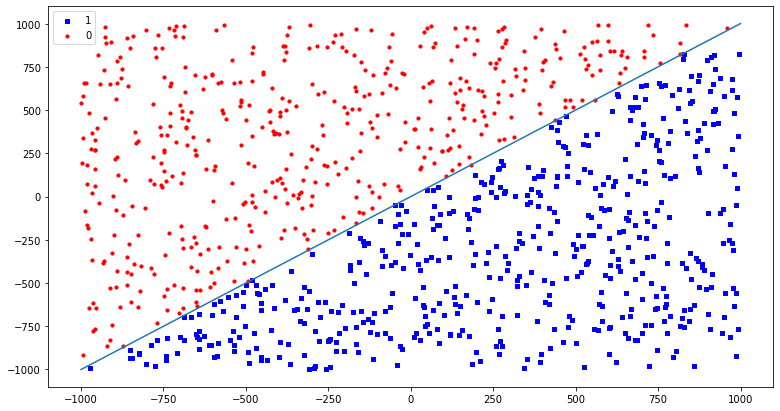

In [67]:

plt.figure(figsize=(13, 7))
x_b = []
y_b = []
x_r = []
y_r = []
for example in dataAll:
    if example[2] == 1.0:
        x_b.append(example[0])
        y_b.append(example[1])
    if example[2] == 0.0:
        x_r.append(example[0])
        y_r.append(example[1])
        
size = 10
plt.scatter(x_b, y_b, s=size, color='b', marker="s", label='1')
plt.scatter(x_r, y_r, s=size, color='r', marker="o", label='0')
plt.legend(loc='upper left')
plt.plot([1000, -1000],[x2_1, x2_2])
plt.show()
